# **1. Perkenalan Dataset**


# Proyek Machine Learning Untuk Pemula 
- **Nama:** Adilah Widiasti
- **Email:** adilahwidiasti86@gmail.com
- **ID Dicoding:** adilahwidiasti - B244035E

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [2]:
import pandas as pd

# Load dataset
file_path = '../data/data_science_job.csv'
data = pd.read_csv(file_path)

# Tampilkan informasi dasar tentang dataset
print(data.info())
print(data.head())

# Memeriksa tipe data
data_types = data.dtypes

# Memisahkan kolom kategorikal dan numerikal
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

# Cek apakah ada minimal satu kolom kategorikal dan satu kolom numerikal
if len(categorical_columns) > 0 and len(numerical_columns) > 0:
    print("Dataset memenuhi kriteria: terdapat kolom kategorikal dan numerikal.")
    print(f"Kolom Kategorikal: {list(categorical_columns)}")
    print(f"Kolom Numerikal: {list(numerical_columns)}")
else:
    print("Dataset tidak memenuhi kriteria: tidak ada cukup kolom kategorikal atau numerikal.")

# Menentukan nama kolom yang mungkin dianggap sebagai label
possible_label_columns = ['target', 'label', 'class', 'output']

# Memeriksa apakah salah satu dari kolom tersebut ada dalam dataset
label_columns = [col for col in possible_label_columns if col in data.columns]

if label_columns:
    print("Dataset memiliki label:")
    print(label_columns)
else:
    print("Dataset tidak memiliki label.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None
   work_year                             job_title  job_category  \
0       2022  Machine Learning Engineer  in office      Analysis   
1       2020                

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
# 3. Memeriksa Dataset

# Tampilkan beberapa baris awal dari dataset
print("Tampilan Beberapa Baris Pertama dari Dataset:")
print(data.head())  # Menampilkan 5 baris pertama

# Tampilkan informasi dasar tentang dataset
print("\nInformasi Dataset:")
print(data.info())  # Struktur dataset

# Memeriksa jumlah baris dan kolom
print(f"\nJumlah baris: {data.shape[0]}, Jumlah kolom: {data.shape[1]}")

# Memeriksa tipe data setiap kolom
print("\nTipe Data Setiap Kolom:")
print(data.dtypes)  # Tipe data dari setiap kolom

# Memeriksa nilai yang hilang di setiap kolom
missing_values = data.isnull().sum()
print("\nJumlah Nilai Hilang di Setiap Kolom:")
print(missing_values[missing_values > 0])  # Kolom dengan nilai hilang

# Memeriksa statistik deskriptif untuk kolom numerikal
print("\nStatistik Deskriptif untuk Kolom Numerikal:")
print(data.describe())  # Statistik deskriptif

# Memeriksa statistik deskriptif untuk kolom kategorikal
print("\nStatistik Deskriptif untuk Kolom Kategorikal:")
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"\nKolom: {col}")
    print(data[col].value_counts())  # Frekuensi nilai unik
    print(f"Nilai unik: {data[col].unique()}")  # Nilai unik


Tampilan Beberapa Baris Pertama dari Dataset:
   work_year                             job_title  job_category  \
0       2022  Machine Learning Engineer  in office      Analysis   
1       2020                Statistician  (Remote)         ML/AI   
2       2022           Machine Learning Engineer           ML/AI   
3       2022               Data Analyst  in office         ML/AI   
4       2020                        Statistician    Data Science   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR  186597         136086                 US               MI   
1             JPY  110630          67982                 JP               EX   
2             INR   61280         153309                 UK               MI   
3             JPY  154130         135242                 DE               SE   
4             EUR  172312          35156                 UK               MI   

  employment_type work_setting company_location company_size  
0

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None

Jumlah baris dan kolom:
Jumlah baris: 5000, Jumlah kolom: 12

Tipe Data Setiap Kolom:
work_year              int64
job_title             object

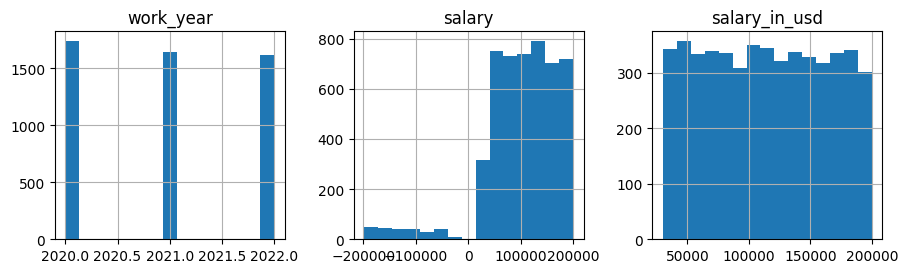

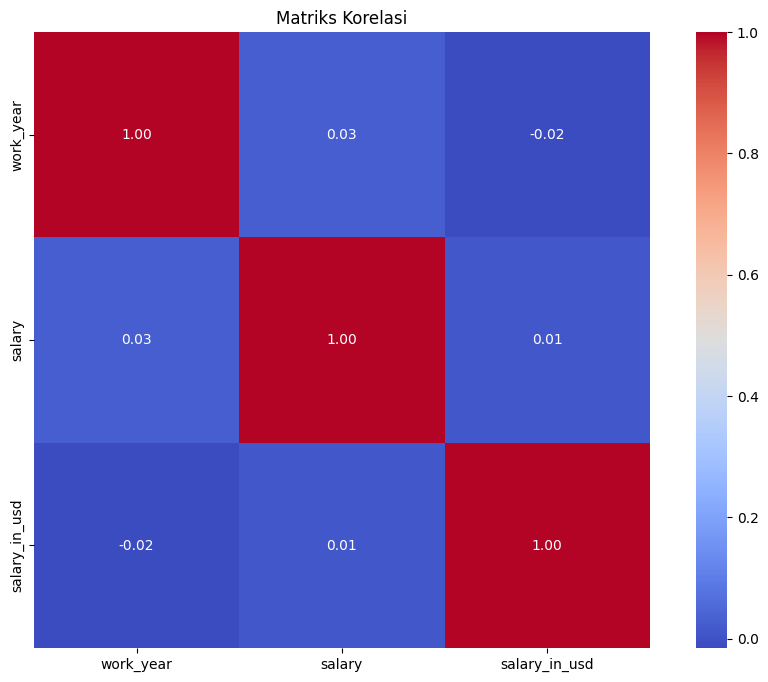

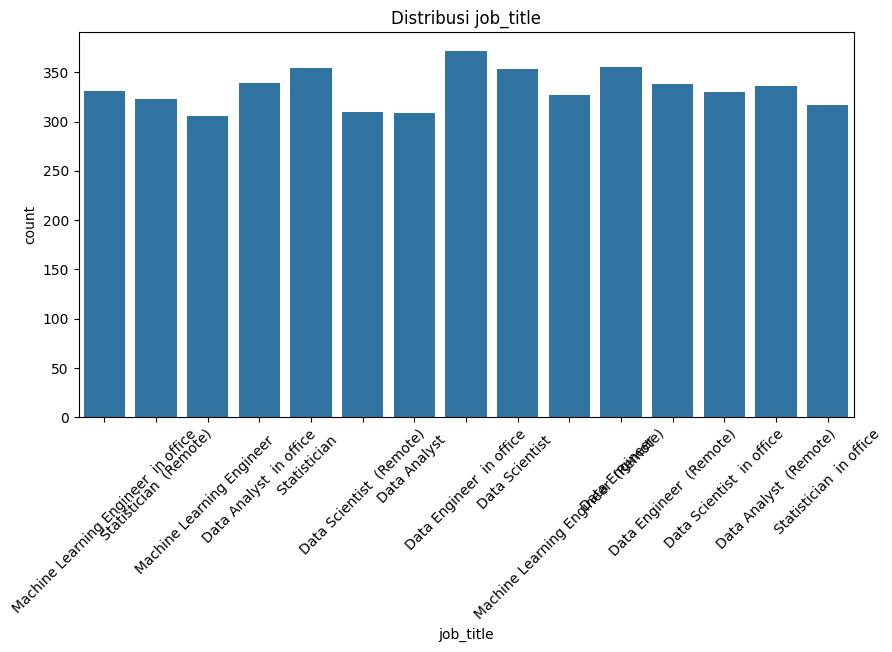

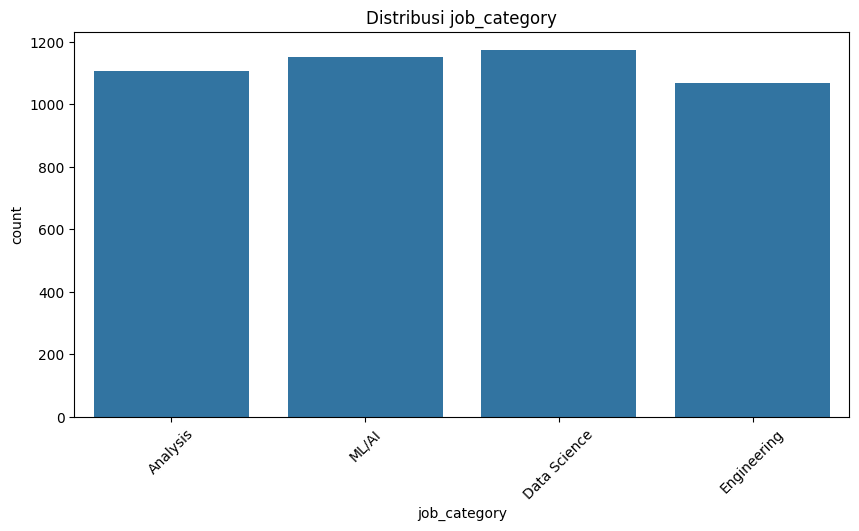

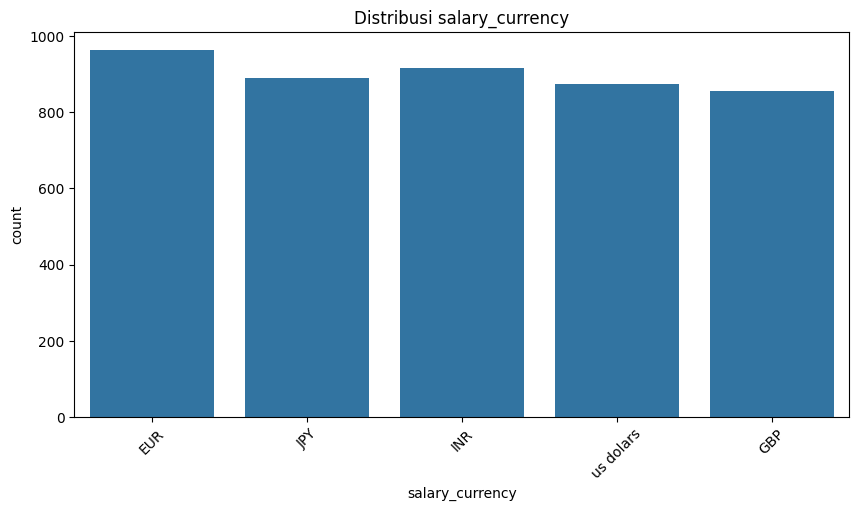

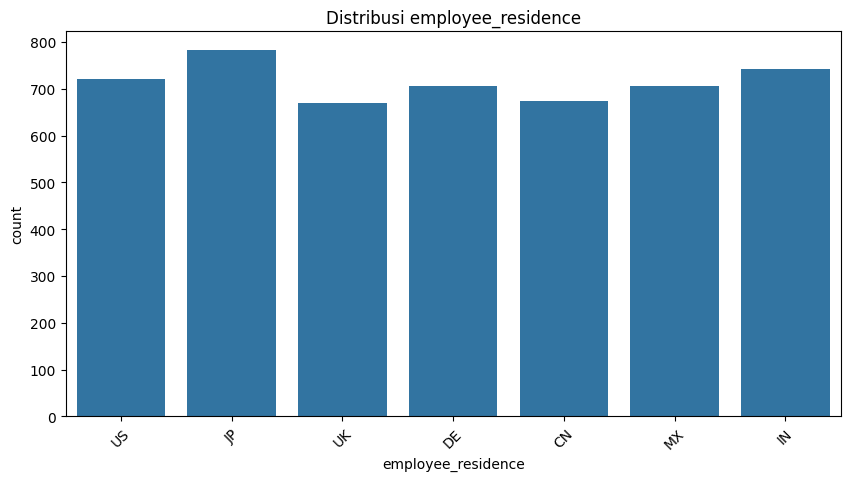

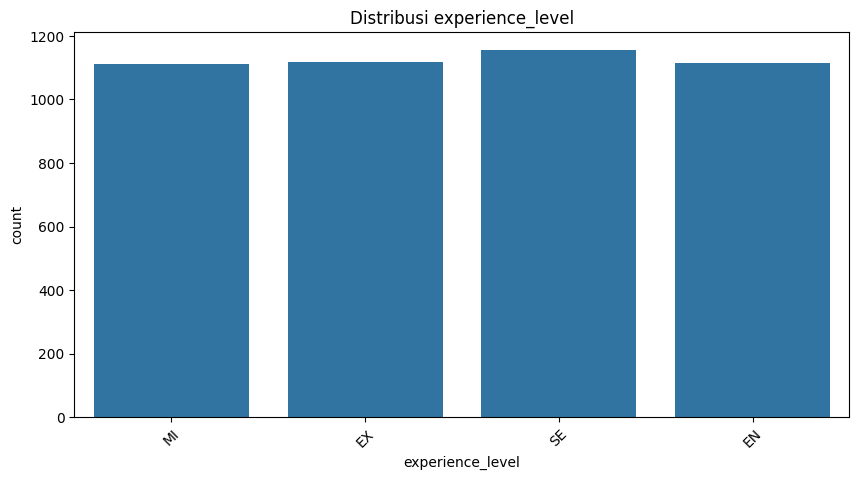

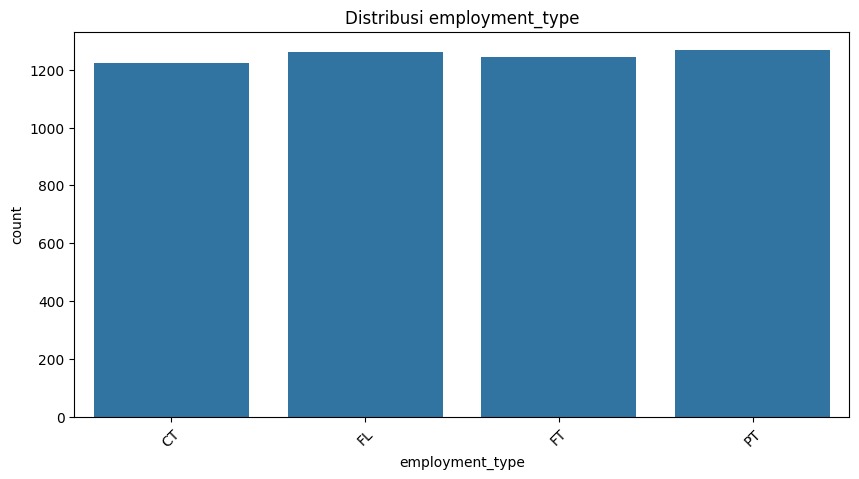

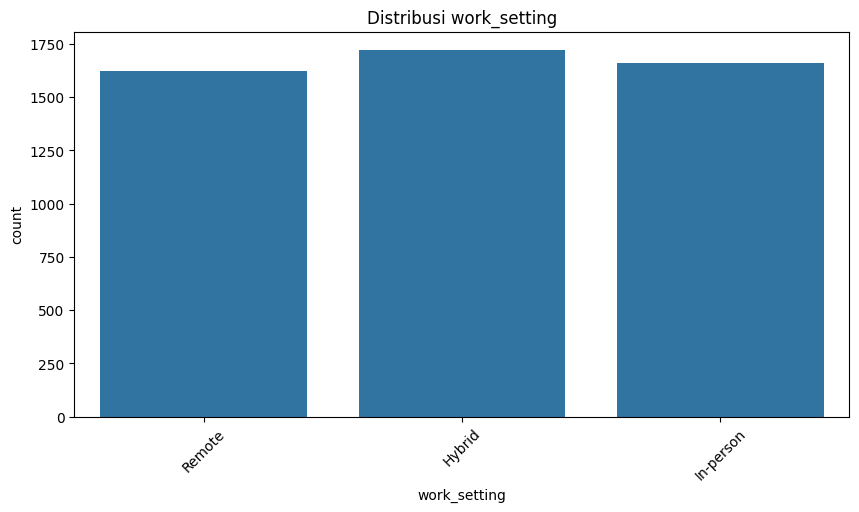

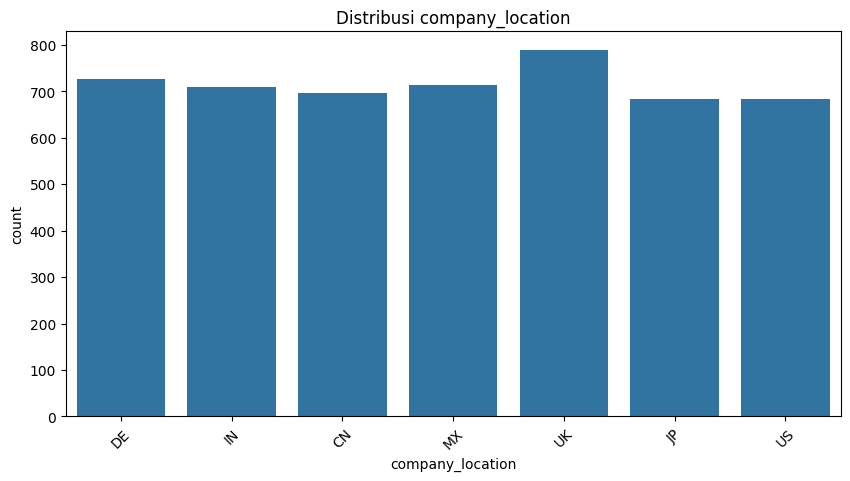

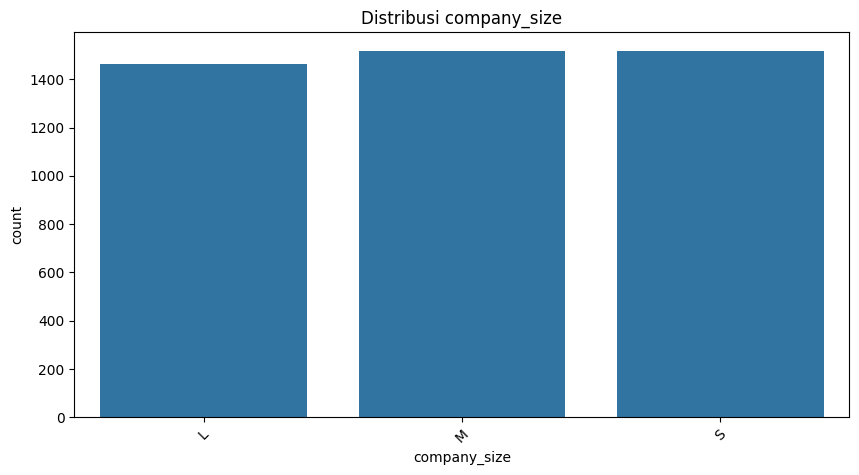

In [5]:
# Memuat dataset
df = pd.read_csv('../data/data_science_job.csv')  

# Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# Menghitung jumlah baris dan kolom
print("\nJumlah baris dan kolom:")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

# Menampilkan tipe data di setiap kolom
print("\nTipe Data Setiap Kolom:")
print(df.dtypes)

# Menghitung jumlah nilai hilang di setiap kolom
print("\nJumlah Nilai Hilang di Setiap Kolom:")
print(df.isnull().sum())

# Menangani nilai hilang (opsional)
df_cleaned = df.dropna(axis=1, how='all')

# Statistik deskriptif untuk kolom numerikal
print("\nStatistik Deskriptif untuk Kolom Numerikal:")
numerical_desc = df_cleaned.describe()
print(numerical_desc)

# Menampilkan tipe data kolom numerikal
print("\nTipe Data Kolom Numerikal:")
print(df_cleaned[numerical_desc.columns].dtypes)

# Statistik deskriptif untuk kolom kategorikal
print("\nStatistik Deskriptif untuk Kolom Kategorikal:")
categorical_desc = df_cleaned.describe(include=['object', 'category'])
print(categorical_desc)

# Menampilkan tipe data kolom kategorikal
print("\nTipe Data Kolom Kategorikal:")
print(df_cleaned[categorical_desc.columns].dtypes)

# Visualisasi distribusi untuk kolom numerikal
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int']).columns
df_cleaned[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 5))
plt.tight_layout()
plt.show()

# Visualisasi hubungan antar variabel (misalnya, matriks korelasi)
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

# Visualisasi untuk variabel kategorikal
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x=col)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [6]:
# Asumsi df sudah terdefinisi sebelumnya

# 1. Menghapus atau Menangani Data Kosong (Missing Values)
# Mengisi nilai kosong dengan modus untuk kolom kategorikal dan median untuk kolom numerikal
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64']).columns

# Mengisi nilai kosong untuk kolom kategorikal
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Mengisi nilai kosong untuk kolom numerikal
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# 2. Menghapus Data Duplikat
df = df.drop_duplicates()

# 3. Pastikan kolom numerikal valid dan tidak ada NaN
numerical_cols = df.select_dtypes(include=['float64']).columns  # Perbarui daftar kolom numerikal
if len(numerical_cols) == 0:
    print("Tidak ada kolom numerikal untuk dinormalisasi.")
else:
    # Pastikan tidak ada nilai NaN
    if df[numerical_cols].isnull().values.any():
        print("Masih ada nilai NaN di kolom numerikal. Silakan periksa pengisian nilai.")
    else:
        scaler = StandardScaler()
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 4. Deteksi dan Penanganan Outlier
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

for col in numerical_cols:
    df[col] = remove_outliers_iqr(df[col])

# 5. Encoding Data Kategorikal
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 6. Binning (Pengelompokan Data)
bins = [0, 50000, 100000, 150000, 200000]
labels = ['Low', 'Medium', 'High', 'Very High']
df['salary_category'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels)

# Hasil akhir
print(df.info())
print(df.head())


Tidak ada kolom numerikal untuk dinormalisasi.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   work_year                                       5000 non-null   int64   
 1   salary                                          5000 non-null   int64   
 2   salary_in_usd                                   5000 non-null   int64   
 3   job_title_Data Analyst  (Remote)                5000 non-null   bool    
 4   job_title_Data Analyst  in office               5000 non-null   bool    
 5   job_title_Data Engineer                         5000 non-null   bool    
 6   job_title_Data Engineer  (Remote)               5000 non-null   bool    
 7   job_title_Data Engineer  in office              5000 non-null   bool    
 8   job_title_Data Scientist                        5000 non-null

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [7]:
# Pilih fitur untuk clustering
features = ['work_year', 'salary', 'salary_in_usd', 'job_category_Data Science', 'salary_currency_us dolars']
X = df[features]

# Normalisasi Data
scaler = MinMaxScaler()  # Menggunakan MinMaxScaler
X_scaled = scaler.fit_transform(X)

# PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, kmeans_labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score untuk KMeans dengan {k} cluster: {score}')

# Tentukan jumlah cluster terbaik
best_k = 5 
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
final_kmeans_labels = final_kmeans.fit_predict(X_pca)

# Evaluasi KMeans
final_silhouette_score = silhouette_score(X_pca, final_kmeans_labels)
print(f'Silhouette Score untuk KMeans dengan {best_k} cluster: {final_silhouette_score}')

# Analisis cluster
for cluster in range(best_k):
    cluster_points = X_pca[final_kmeans_labels == cluster]
    print(f'Cluster {cluster}: {len(cluster_points)} titik')

# Evaluasi lain, seperti inertia
inertia = final_kmeans.inertia_
print(f'Inertia untuk KMeans dengan {best_k} cluster: {inertia}')


Silhouette Score untuk KMeans dengan 2 cluster: 0.5912356842240464
Silhouette Score untuk KMeans dengan 3 cluster: 0.645739427960763
Silhouette Score untuk KMeans dengan 4 cluster: 0.6872095795771072
Silhouette Score untuk KMeans dengan 5 cluster: 0.8110009465441369
Silhouette Score untuk KMeans dengan 6 cluster: 0.8717205894174996
Silhouette Score untuk KMeans dengan 7 cluster: 0.8744174370907782
Silhouette Score untuk KMeans dengan 8 cluster: 0.876161528732561
Silhouette Score untuk KMeans dengan 9 cluster: 0.8821183922043542
Silhouette Score untuk KMeans dengan 5 cluster: 0.8110009465441369
Cluster 0: 1106 titik
Cluster 1: 585 titik
Cluster 2: 1153 titik
Cluster 3: 1088 titik
Cluster 4: 1068 titik
Inertia untuk KMeans dengan 5 cluster: 88.95211755721687


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [8]:
# Evaluasi KMeans
final_silhouette_score = silhouette_score(X_pca, final_kmeans_labels)
print(f'Silhouette Score untuk KMeans dengan {best_k} cluster: {final_silhouette_score}')

# Analisis cluster
for cluster in range(best_k):
    cluster_points = X_pca[final_kmeans_labels == cluster]
    print(f'Cluster {cluster}: {len(cluster_points)} titik')

# Pertimbangan lain untuk evaluasi
# Kamu bisa menambahkan evaluasi dengan metode lain, seperti inertia atau Davies-Bouldin index
inertia = final_kmeans.inertia_
print(f'Inertia untuk KMeans dengan {best_k} cluster: {inertia}')


Silhouette Score untuk KMeans dengan 5 cluster: 0.8110009465441369
Cluster 0: 1106 titik
Cluster 1: 585 titik
Cluster 2: 1153 titik
Cluster 3: 1088 titik
Cluster 4: 1068 titik
Inertia untuk KMeans dengan 5 cluster: 88.95211755721687


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [9]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

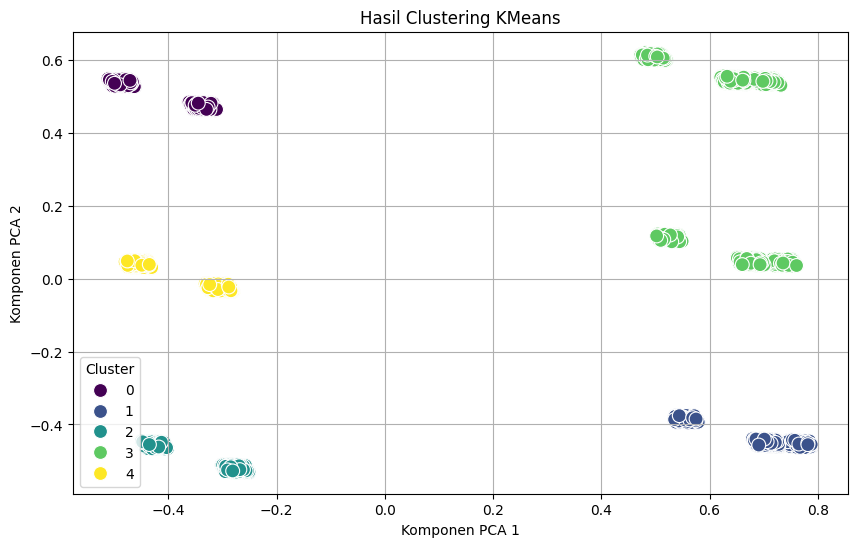

In [10]:
# Misalkan X_pca adalah hasil PCA dan final_kmeans_labels adalah label cluster KMeans

# Visualisasi hasil clustering KMeans
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=final_kmeans_labels, palette='viridis', s=100)
plt.title('Hasil Clustering KMeans')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [11]:
# Tambahkan label cluster ke DataFrame
df['Cluster'] = final_kmeans_labels

# Analisis karakteristik setiap cluster
cluster_summary = df.groupby('Cluster').agg({
    'work_year': ['mean', 'std', 'count'],
    'salary': ['mean', 'std'],
    'salary_in_usd': ['mean', 'std'],
    'job_category_Data Science': 'mean',
    'salary_currency_us dolars': 'mean'
}).reset_index()

print("Ringkasan Karakteristik Tiap Cluster:")
print(cluster_summary)

# Interpretasi Hasil Clustering
for cluster_id in cluster_summary['Cluster']:
    cluster_data = cluster_summary[cluster_summary['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} - Karakteristik:")
    print(cluster_data)

# Interpretasi Hasil
print("\nInterpretasi Hasil Clustering:")

Ringkasan Karakteristik Tiap Cluster:
  Cluster    work_year                         salary                 \
                  mean       std count           mean            std   
0       0  2022.000000  0.000000  1106  115293.911392   48704.434267   
1       1  2020.000000  0.000000   585   72874.705983  102907.982736   
2       2  2020.000000  0.000000  1153  113338.566349   49520.216390   
3       3  2021.474265  0.499567  1088   80542.970588   93142.783285   
4       4  2021.000000  0.000000  1068  114021.205993   48788.929246   

   salary_in_usd               job_category_Data Science  \
            mean           std                      mean   
0  111988.658228  48438.489032                       0.0   
1  115769.338462  48915.515516                       1.0   
2  113497.857762  49141.493189                       0.0   
3  113988.502757  49637.731640                       1.0   
4  116028.032772  49337.175046                       0.0   

  salary_currency_us dolars  
      

Tulis hasil interpretasinya di sini.
## **Interpretasi Hasil Clustering**

### Ringkasan Karakteristik Tiap Cluster

Setelah melakukan clustering, kita mendapatkan lima cluster yang memiliki karakteristik yang berbeda. Berikut adalah analisis dari masing-masing cluster berdasarkan fitur yang tersedia:

### Cluster 0
- **Rata-rata Work Year**: 2022
- **Rata-rata Salary**: $115,293.91
- **Rata-rata Salary in USD**: $111,988.66
- **Job Category Data Science**: 0 (tidak ada)
- **Persentase Currency USD**: 20.25%
- **Jumlah Anggota**: 1106

**Interpretasi**: Cluster ini terdiri dari individu yang baru saja memulai karir mereka pada tahun 2022. Mereka memiliki gaji rata-rata yang cukup tinggi, meskipun tidak ada yang bekerja di kategori Data Science. Ini mungkin menunjukkan posisi entry-level di bidang lain yang memiliki kompensasi tinggi.

### Cluster 1
- **Rata-rata Work Year**: 2020
- **Rata-rata Salary**: $72,874.71
- **Rata-rata Salary in USD**: $115,769.34
- **Job Category Data Science**: 1 (ada)
- **Persentase Currency USD**: 14.02%
- **Jumlah Anggota**: 585

**Interpretasi**: Anggota cluster ini memiliki pengalaman kerja rata-rata sekitar 3 tahun dan terlibat dalam kategori Data Science. Meskipun gaji rata-ratanya lebih rendah dibandingkan dengan cluster lainnya, mereka beroperasi dalam industri yang biasanya memberikan gaji yang lebih tinggi.

### Cluster 2
- **Rata-rata Work Year**: 2020
- **Rata-rata Salary**: $113,338.57
- **Rata-rata Salary in USD**: $113,497.86
- **Job Category Data Science**: 0 (tidak ada)
- **Persentase Currency USD**: 18.21%
- **Jumlah Anggota**: 1153

**Interpretasi**: Cluster ini menunjukkan individu dengan pengalaman kerja yang mirip dengan Cluster 1 tetapi dengan gaji yang jauh lebih tinggi. Mereka tidak terlibat dalam Data Science, mungkin di sektor lain yang membayar lebih baik.

### Cluster 3
- **Rata-rata Work Year**: 2021.47
- **Rata-rata Salary**: $80,542.97
- **Rata-rata Salary in USD**: $113,988.50
- **Job Category Data Science**: 1 (ada)
- **Persentase Currency USD**: 13.88%
- **Jumlah Anggota**: 1088

**Interpretasi**: Anggota cluster ini memiliki pengalaman kerja yang lebih tinggi dan terlibat dalam kategori Data Science. Gaji mereka lebih rendah daripada Cluster 2, tetapi mereka juga berkontribusi pada bidang yang berkembang pesat.

### Cluster 4
- **Rata-rata Work Year**: 2021
- **Rata-rata Salary**: $114,021.21
- **Rata-rata Salary in USD**: $116,028.03
- **Job Category Data Science**: 0 (tidak ada)
- **Persentase Currency USD**: 19.48%
- **Jumlah Anggota**: 1068

**Interpretasi**: Cluster ini menunjukkan individu dengan pengalaman kerja yang sebanding dengan Cluster 3 tetapi tanpa keterlibatan dalam Data Science. Mereka memiliki gaji yang tinggi, menunjukkan kemungkinan peran dalam industri lain yang memberikan imbalan baik.

### Kesimpulan Umum
Hasil clustering menunjukkan pola yang menarik dalam data. Ada beberapa cluster dengan karakteristik yang jelas, yang dapat membantu dalam pengambilan keputusan bisnis. Analisis klaster telah mengungkap segmen pasar yang menarik, khususnya Cluster 0 yang terdiri dari individu dengan pengalaman kerja awal. Kelompok ini memiliki potensi besar sebagai talenta muda yang kompetitif, menawarkan peluang baru untuk optimalisasi strategi rekrutmen dan pengembangan karir. Temuan ini menunjukkan bahwa model klasterisasi dapat memberikan wawasan yang berharga untuk pengambilan keputusan bisnis yang lebih baik.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [12]:
# Menyimpan hasil clustering ke dalam DataFrame
df['Cluster'] = final_kmeans_labels

# Menyimpan DataFrame ke file CSV
output_file_path = '../data/clustering_results.csv'
df.to_csv(output_file_path, index=False)

print(f"Hasil clustering telah disimpan ke dalam {output_file_path}")


Hasil clustering telah disimpan ke dalam ../data/clustering_results.csv
